<center>
<h1> Assignment in intro to data neural computation</h1>
<h2> Part C&D </h2>
<h3> By : Michael trushkin </h3>
</center>


## Data

All data Is two dimensional ,  <x,y>   where    -1 <= x, y <= 1.  <br>
The data is all data points <x, y> where x is of the form m/100 where m is an integer between -100 and +100  <br>
and y is of the form  n/100 with n an integer between -100 and +100.

suppose that:
<x,y> has value of 1 iff :  <center>1/2 < x^2+y^2 < 3/4</center>

## About Part C

Try to traing a Neural network using back propogation, to predict the given function.<br>
show the output of each of the neuron's in the network.

### what we will do
* we will build out own neural network class, and implement back prop.


## About the neural network
* we will use mini-batch training, our model supports batches of any sizes.
* we use momentum model meaning the Gradient at time t, is combined with fraction of the gradient of time t-1
* the momentum level is set to 0.5 by default and the learning rate is 0.1 by default.

we use momentum because from some test's i have made it simply converges faster.

In [2453]:
import numpy as np
import matplotlib.pyplot as plt
import importlib
import myGraphicFuncs
import NeuralNet
importlib.reload(myGraphicFuncs)
importlib.reload(NeuralNet)
from NeuralNet import NeuralNetwork
np.set_printoptions(suppress=True)
import myGraphicFuncs as mg

In [1215]:
def f(x, y):
    d = x**2 + y**2
    if 0.5 <= d <= 0.75:
        return 1
    return 0

# def f(x,y):
#     if x>0.5 and y>0.5:
#         return 1
#     return 0

maxn = 100
maxm = 100

data_set1000 = mg.create_data(f, 1000, maxn, maxm)
data_negative, data_positive = mg.generate_data_all(f, maxn, maxm)
data_uniform1000 = mg.generate_uniform_dataset(f, 1000, data_positive, data_negative)
# data_uniform1000[np.random.choice(1000, 5)]
data_all = mg.generate_data_all_noseperation(f, maxn, maxm)

## plot some random uniform data

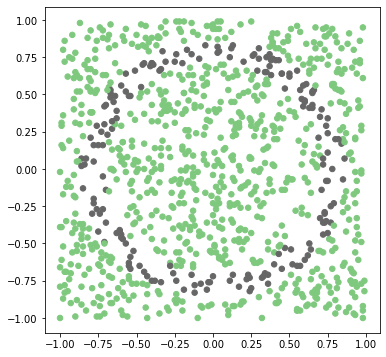

In [1216]:
mg.plot_data(data_set1000[:,:2], data_set1000[:,2:])

## plot uniform data a.k.a where there is 50% bad and good examples.

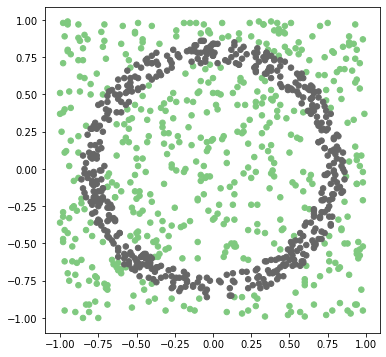

In [1217]:
mg.plot_data(data_uniform1000[:,:2], data_uniform1000[:,2:])

In [1218]:
#test = NeuralNetwork([2, 8, 4, 1])
#mg.plot_test(test, x, "prediction-"+name, s=35)

## define neural network train and show results
* architecture we will use the \[2, 8, 3, 1\] architecture, as shown in one of the examples.
* note: the reason for 3 neurons in the layer 2, is due to noticing that this neuron doesnt predict anything ( from images )

## try predict few cases without training

### Our training function that will train the network on some data, in mini batches
* also save the network state at each iteration ( weights, biases )

In [1219]:
def calculate_error(_net : NeuralNetwork, X, Y):
    prediction = _net.predict(X)
    err = np.square(prediction - Y).sum()
    return err

def train_net(_net : NeuralNetwork, _x, _y, iterations, batch_size, epsilone = 1, log = True):
    net_at_time_t = {}
    _size = _x.shape[0]
    indecies_t = np.random.choice(_size, 6)
    partition = int(_size / batch_size)

    errors = {}

    errors[0] = calculate_error(_net, _x, _y);
    inner_iters = 250

    best = _net
    best_err = errors[0]
    if log :
        print("error before training :", calculate_error(_net, _x, _y))
    for i in range(iterations):
        err = 0
        for k in range(inner_iters):
            permutation = np.random.permutation(_size)
            for j in range(partition):
                batch = permutation[batch_size * j : batch_size * (j + 1)]
                bx = _x[batch, :]
                by = _y[batch, :]
                r = _net.train(bx, by)
                # err += r
                # print(r)
        err =calculate_error(_net, _x, _y)
        if err < best_err:
            best_err = err
            best = _net.copy()
        errors[(i+1) * inner_iters] = err
        net_at_time_t[i] = _net.copy()
        if(log):
            #print("net error per 1000 data :",_net.err1000, "net alpha :", _net.alpha)
            print("epoch", (i + 1) * inner_iters, ", error :", err)
        if(err < epsilone):
            print("hit error below epsiline breaking out")
            break
    return best, net_at_time_t , errors
    # print(indecies_t)
    # print(_x[indecies_t, :])

In [1220]:
x = data_uniform1000[:, :2]
y = data_uniform1000[:, 2:]

# # x = data_set1000[:, :2]
# # y = data_set1000[:, 2:]

net = NeuralNetwork([2, 8, 4, 1], learning_rate=0.1)
best_net, nets, errors  = train_net(net, x, y, 35, 64, 0.1, False)

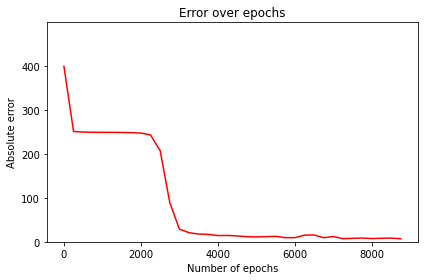

In [1221]:
plt.plot(errors.keys(), errors.values(), c='r');
plt.title("Error over epochs")
plt.xlabel("Number of epochs")
plt.ylabel("Absolute error")
plt.ylim(0, errors[0] + 100)
#plt.xlim(0, 6500)
plt.tight_layout()

## Ploting the networks prediction on the full data every 5th iteration
* Note : the network trains on a closed training set with 1000 examples. <br>
  while we plot based on the 40k possible points <br>
  ( we skip over few to plot it nicely )

In [1222]:
errors

{0: 399.6857937244648,
 250: 251.26131733466056,
 500: 249.92901798979446,
 750: 249.42997483123935,
 1000: 249.22638607368344,
 1250: 249.28791170240325,
 1500: 249.0159296100231,
 1750: 248.687622835145,
 2000: 247.57660542031078,
 2250: 243.38140781191493,
 2500: 207.5448974461972,
 2750: 89.41215703627347,
 3000: 28.777692042663926,
 3250: 20.82665602178537,
 3500: 17.6602488784169,
 3750: 16.92270691710941,
 4000: 14.223499236843079,
 4250: 14.420768671615257,
 4500: 13.414404892491508,
 4750: 11.651719880333605,
 5000: 11.170877799428993,
 5250: 11.840471767634487,
 5500: 12.395064515520382,
 5750: 9.4071913049616,
 6000: 9.399508700448953,
 6250: 15.153530274149674,
 6500: 15.499613529047268,
 6750: 9.27555102654166,
 7000: 12.07236520808617,
 7250: 7.113044880121653,
 7500: 7.904731947892648,
 7750: 8.545866162415658,
 8000: 7.408301786592624,
 8250: 8.034995909713093,
 8500: 8.447984793329258,
 8750: 6.949666850536308}

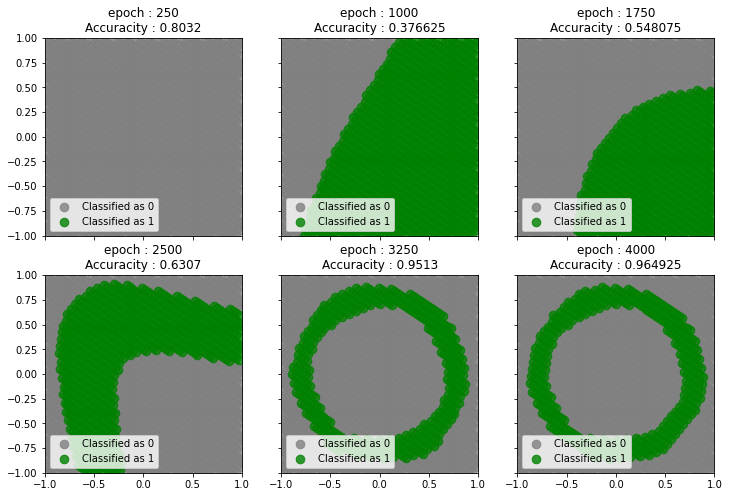

In [1223]:
i = 1
fig, axs = plt.subplots(nrows=2, ncols=3, sharex=True, sharey=True, figsize=(12,8))

all_x = data_all[:, :2]
all_y = data_all[:, 2:]
# plot_test(axs[0][0], test_results[0])
for i in range(6):
    j = i % 3
    k = int(i / 3)
    iteration = i * 3
    accuracity = mg.calculate_accuracity(nets[iteration], all_x, all_y)
    name = "epoch : " + str((iteration + 1) * 250) + "\nAccuracity : " + str(accuracity) 
    mg.plot_test(nets[iteration], all_x[::23], name, axs[k][j], s=75)
plt.show()

## We can clearly see the model is "learning", and generalize well even to the "complete data"
* note that we plot the model predictions given data_points it has never seen before!

## Next i would like to showcase the output of every single neuron in the network

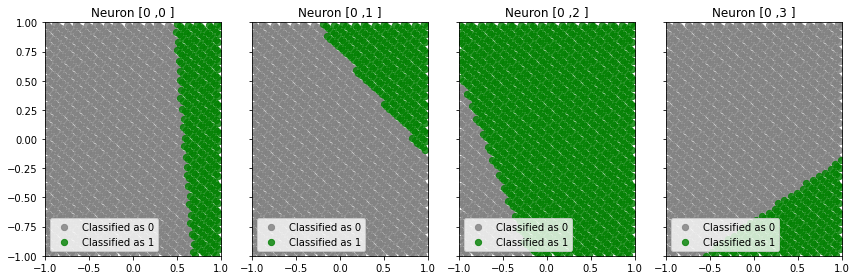

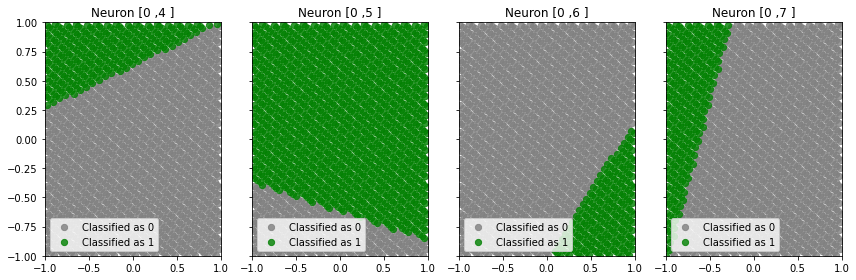

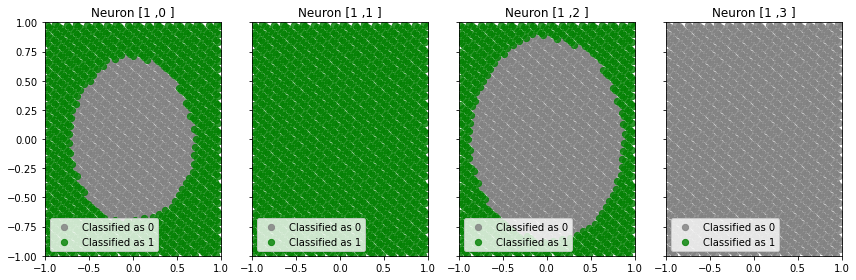

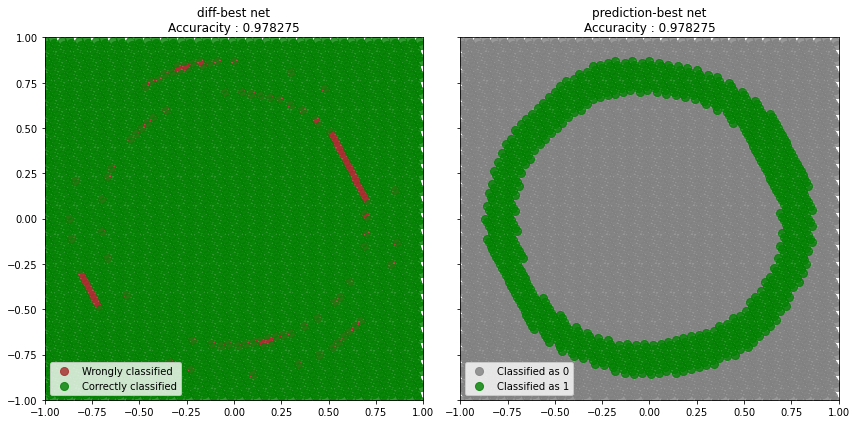

In [1224]:
#best_net.predict(all_x[::23])

px = all_x[::23]
pred = best_net.predict(px)

# t = np.array([0.5, 0.5])
# best_net.predict(t)
for j in range(best_net.num_layers - 1):
    items = best_net.layers[j + 1]

    fig, axs = plt.subplots(nrows=1, ncols= 4 , sharex=True, sharey=True, figsize=(12 ,4))
    #print(best_net.output[j+1])
    for i in range(items):
        index = i % 4
        if i == 4:
            plt.tight_layout()
            fig, axs = plt.subplots(nrows=1, ncols= 4 , sharex=True, sharey=True, figsize=(12 ,4))
        #print(best_net.output[j+1][i])
        #name = "epoch : " + str((iteration + 1) * 250) + "\nAccuracity : " + str(accuracity) 
        name = "Neuron [" + str(j) + " ," + str(i) + " ]" 
        mg.plot_test_inner(best_net.output[j+1][i], px, name, axs[index], s=39)
        #mg.plot_test(nets[iteration], px, name, axs[k][j], s=75)
    plt.tight_layout()
    plt.show()

# plot the Final neuron output ( actual prediction, also showcase the difference from the real data-set )
fig, axs = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True, figsize=(12,6))

netp = best_net
accuracity = mg.calculate_accuracity(netp, all_x, all_y)

name = "best net" +"\nAccuracity : " + str(accuracity)

mg.plot_diff(netp, all_x[::9], all_y[::9], "diff-"+name, axs[0], s=65)
mg.plot_test(netp, all_x[::9], "prediction-"+name, axs[1], s=65)
plt.tight_layout()
plt.show()

## Pard D
Now use the trained neurons from the next to last level of Part 3 as input and only an Adaline for the output.    <br>
(That is, you will give the adaline the output of the neurons from Part 3 in the level below the output,  and train only the Adaline.) <br>
Describe how accurate the Adaline can be.  Give diagrams.<br>

Draw whatever conclusions you think are appropriate from your results.


### my prediction
Adaline is the same thing as backprop, and thus would result in very similar results.

## Note that adaline inputs must be binary that is 1 or -1.
so we predict out training set and test set, <br>
then we need to take the n-1 layer of the network outputs and convert them to binary <br>
last we use that as the input to the adaline

In [2467]:
def extract_n_input(_net : NeuralNetwork, X):
    _net.predict(X)
    _nx = _net.output[best_net.num_layers - 1].T
    _nx[_nx > 0.5] = 1
    _nx[_nx <= 0.5] = -1

    return _nx
    

all_x = data_all[:, :2]
all_y = data_all[:, 2:]

train_nx = extract_n_input(best_net, x)
all_nx = extract_n_input(best_net, all_x)

## Conver the Output to be -1 and 1 ( as the output of the neuron )

In [2472]:
yn = y.copy()
yn[yn <= 0.5] = -1

all_yn = all_y.copy()
all_yn[all_yn <= 0.5] = -1

In [2468]:
from neuron import Neuron
import neuron
importlib.reload(neuron)

n = Neuron(4, 1, 0.01)

In [2469]:
permutation = np.random.permutation(1000)
xnt = train_nx[permutation]
ynt = yn[permutation]

err = 0
for i in range(100):
    err += n.train_all(xnt, ynt).sum()
mg.calculate_accuracity(n, train_nx, yn)

0.994

## 0.994% Accuracity on the training set!
* note : that the data in the training set is 50% 50%

<AxesSubplot:title={'center':'prediction-Adaline neuron\nAccuracity : 0.9533'}>

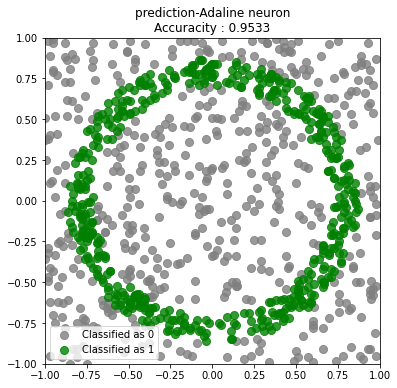

In [2470]:
npred = n.predict(train_nx)
mg.plot_test_inner(npred, x, "prediction-"+name, s=65)

## Plot the adaline neuron prediction on the whole set
as well as calculating the accuracity

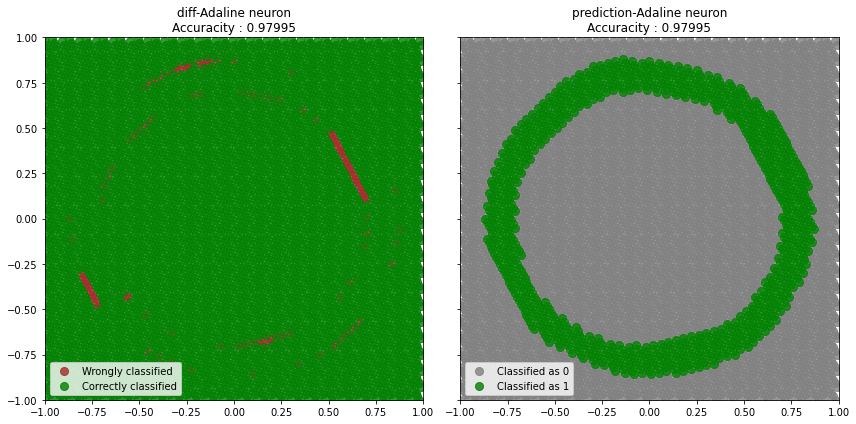

In [2471]:
# plot the Final neuron output ( actual prediction, also showcase the difference from the real data-set )
fig, axs = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True, figsize=(12,6))
accuracity = mg.calculate_accuracity(n, all_nx, all_yn)

name = "Adaline neuron" +"\nAccuracity : " + str(accuracity)

npred = n.predict(all_nx)[::9]

mg.plot_diff_inner(npred, all_x[::9], all_yn[::9], "diff-"+name, axs[0], s=65)
mg.plot_test_inner(npred, all_x[::9], "prediction-"+name, axs[1], s=65)
plt.tight_layout()
plt.show()

# Conclusion

as expected Adaline neuron connected to the pred final layer of a trained neural network with accuracity of 97%<br>
can achive the same accuracity!<br>
as expected.<br>

consider a neural network that has a final layer that is simply an identity function<br>
and the layer before that actually gives the final result<br>

if our neuron simply traines to by the identity function ( with it can )<br>
we would have the same output as the original neural network.

that is a neural network where the final layer is an Adaline neuron is the same thing!<br>
the only difference being how we train the model.